In [ ]:
# Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Optional: prevent TensorFlow from using GPU (for debugging or testing)
tf.config.set_visible_devices([], 'GPU')

# Check how many GPUs are available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import pandas as pd
import zipfile
from google.colab import drive

drive.mount('/content/drive')  # מחבר את הדרייב, יווצר קישור לנתיב /content/drive

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
import zipfile

zip_file = '/content/drive/MyDrive/content/CNN_dog_cat_dataset.zip'  # הנתיב לקובץ הדחוס בדרייב

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
  zip_ref.extractall('/content/dataset')  # חילוץ הקבצים לתיקייה חדשה

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0,1] — helps speed up training and stabilize gradients
    shear_range=0.2,        # Apply a slight diagonal transformation (shear) — simulates natural changes in camera angle
    zoom_range=0.2,         # Apply random zoom-in effect — helps the model recognize objects at different scales
    horizontal_flip=True    # Flip images horizontally — helps the model handle symmetry (e.g., cat facing left or right)
)

# Testing data generator — only normalization, no augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    '/content/dataset/CNN_dog_cat_dataset/dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    '/content/dataset/CNN_dog_cat_dataset/dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn = Sequential()

# שכבת קונבולוציה ראשונה
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# שכבת קונבולוציה שנייה
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten
cnn.add(Flatten())

# Fully Connected
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=1, activation='sigmoid'))  # בגלל שזה סיווג בינארי

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(x=training_set, validation_data=test_set, epochs=25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 113s 437ms/step - accuracy: 0.5296 - loss: 0.6911 - val_accuracy: 0.6150 - val_loss: 0.6477
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 110s 441ms/step - accuracy: 0.6376 - loss: 0.6350 - val_accuracy: 0.7095 - val_loss: 0.5715
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 401ms/step - accuracy: 0.6916 - loss: 0.5784 - val_accuracy: 0.7215 - val_loss: 0.5334
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 104s 415ms/step - accuracy: 0.7330 - loss: 0.5359 - val_accuracy: 0.7470 - val_loss: 0.5129
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 398ms/step - accuracy: 0.7406 - loss: 0.5160 - val_accuracy: 0.7695 - val_loss: 0.4877
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 102s 407ms/step - accuracy: 0.7676 - loss: 0.4770 - val_accuracy: 0.7700 - val_loss: 0.4829
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 99s 397ms/step - accuracy: 0.7850 - loss: 0.4605 - val_accuracy: 0.7720 - val_loss: 0.4773
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 106s 424ms/step - accuracy: 0.7887 - 

KeyboardInterrupt: 

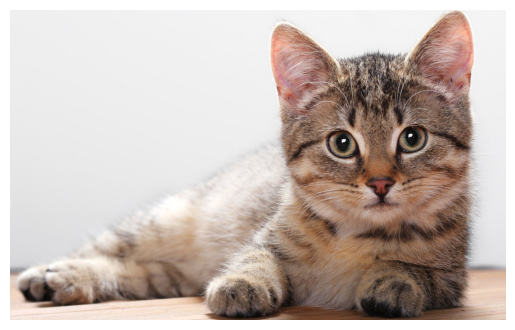

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.3106299]]
cat


In [ ]:
import numpy as np
from keras.preprocessing import image

# טוענים את התמונה
img_path = '/content/dataset/CNN_dog_cat_dataset/dataset/single_prediction/cat_or_dog_2.jpg'
test_image = image.load_img(img_path, target_size=(64, 64))

img = image.load_img(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert image to array
test_image = image.img_to_array(test_image)

# Normalize pixel values (rescale to [0,1])
test_image = test_image / 255.0

# Expand dimensions to match the CNN model input shape
test_image = np.expand_dims(test_image, axis=0)

# Predict using the trained CNN model
result = cnn.predict(test_image)
print(result)

# Interpret the result
if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)